In [1]:
"""
Takes results path and plots some observable over time, specified at the bottom of the script.
"""
import os
os.environ["JAX_PLATFORMS"] = "cpu"

import matplotlib.pyplot as plt
import json
import dotenv
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:

root_path = '/net/vast-storage/scratch/vast/mcdermott/rphess/modula-v2/'
path = Path(root_path) / "experiment/results/"
sub_folders = ['final_results',]

results_concatenated = []
# iterate over all subfolders and open all json files in them
for sub_folder in sub_folders:
    sub_folder_path = path / sub_folder
    for json_file in sub_folder_path.glob('*.json'):
        with open(json_file, 'r') as f:
            data = json.load(f)
            # add the data to the results list
            results = data['results']
            technique = data['parameters']['project']['default']
            lr = data['parameters']['lr']
            wmax = data['parameters']['w_max']
            train_loss = results['losses']
            val_loss = results['val_losses']
            train_acc = results['train_accuracies']
            val_acc = results['accuracies']
            spectral_norms_in = results['mlp_in']['spectral_norm']
            spectral_norms_0 = results['mlp_0']['spectral_norm']
            spectral_norms_out = results['mlp_out']['spectral_norm']
            row = {
                'technique': technique,
                'lr': lr,
                'w_max': wmax,
                'train_loss': train_loss,
                'val_loss': val_loss,
                'train_acc': train_acc,
                'val_acc': val_acc,
                'spectral_norms_in': spectral_norms_in,
                'spectral_norms_0': spectral_norms_0,
                'spectral_norms_out': spectral_norms_out,
            }
            results_concatenated.append(row)
# create a dataframe from the results
results_df = pd.DataFrame(results_concatenated)

In [3]:
results_df

,technique,lr,w_max,train_loss,val_loss,train_acc,val_acc,spectral_norms_in,spectral_norms_0,spectral_norms_out
0,hard_cap,0.398107,4,"[2.3025851249694824, 2.0852846652269363, 1.683...","[2.2991267800331117, 1.5662238001823425, 1.524...","[0.123046875, 0.390625, 0.5078125, 0.4921875, ...","[0.09990234673023224, 0.44365236163139343, 0.4...","[0.03641629219055176, 0.7241287231445312, 1.10...","[0.9639638066291809, 3.6555726528167725, 3.838...","[0.19040565192699432, 0.7169051766395569, 0.76..."
1,none,2.511886,1,"[2.3025851249694824, 2.2298847089211145, 2.233...","[2.289288508892059, 2.272989475727081, 2.21483...","[0.123046875, 0.322265625, 0.310546875, 0.2578...","[0.09990234673023224, 0.20273438096046448, 0.2...","[0.24151825904846191, 2.3107378482818604, 2.50...","[0.915885865688324, 8.242721557617188, 9.40979...","[0.18092311918735504, 1.3234641551971436, 1.36..."
2,orthogonal,0.514532,4,"[2.3025851249694824, 7.998480627934138, 2.1282...","[26.637070178985596, 1.7614202201366425, 1.594...","[0.123046875, 0.279296875, 0.4296875, 0.470703...","[0.09990234673023224, 0.37089845538139343, 0.4...","[1.154160737991333, 1.1543625593185425, 1.1543...","[3.9993772506713867, 3.9989395141601562, 3.998...","[0.7871968150138855, 0.7874215245246887, 0.787..."
3,soft_cap,0.398107,4,"[2.3025851249694824, 2.03579772512118, 1.67255...","[2.2987128853797913, 1.5911865532398224, 1.556...","[0.123046875, 0.421875, 0.46484375, 0.44726562...","[0.09990234673023224, 0.4395507872104645, 0.45...","[0.03828464448451996, 0.7779470682144165, 0.92...","[0.9990383386611938, 3.3382296562194824, 3.905...","[0.19733873009681702, 0.5723471641540527, 0.61..."
4,spec_hammer,0.051453,1,"[2.3025851249694824, 2.2761503954728446, 2.172...","[2.3019928336143494, 2.090756928920746, 1.8030...","[0.123046875, 0.138671875, 0.33984375, 0.33984...","[0.09990234673023224, 0.3116210997104645, 0.38...","[0.07221575826406479, 0.24164099991321564, 0.2...","[1.003366231918335, 1.3770982027053833, 1.7654...","[0.20901553332805634, 0.29995372891426086, 0.3..."
5,spec_normalize,0.630957,2,"[2.3025851249694824, 1.9754634648561478, 1.648...","[2.296727192401886, 1.581897532939911, 1.57690...","[0.123046875, 0.439453125, 0.5, 0.466796875, 0...","[0.09990234673023224, 0.43115234375, 0.4398437...","[0.06066665053367615, 1.3148082494735718, 1.76...","[0.9995644092559814, 3.8438267707824707, 3.069...","[0.19745630025863647, 1.0065549612045288, 1.05..."
6,spec_wd,0.025119,1,"[2.3025851249694824, 2.292865256468455, 2.2620...","[2.3023226141929625, 2.2383171558380126, 2.118...","[0.123046875, 0.091796875, 0.15625, 0.23828125...","[0.09990234673023224, 0.17294922471046448, 0.3...","[0.002415091497823596, 0.05878903344273567, 0....","[0.9995741248130798, 1.17476487159729, 1.35507...","[0.19745205342769623, 0.22754661738872528, 0.2..."


In [4]:
# Set overall style
sns.set(style="whitegrid", context="talk")

In [5]:
tech_colors = {
    "Spectral weight decay":       "#1f77b4",  # muted blue
    "Spectral hammer":    "#ff7f0e",  # orange
    "Spectral normalize":       "#2ca02c",  # green
    "Stiefel manifold":   "#d62728",  # red
    "Hard cap":           "#9467bd",  # purple
    "Soft cap":           "#8c564b",  # brown
    "Baseline":           "#7f7f7f",  # gray
}

# map technique names to official names
tech_map = {
    "spec_wd":       "Spectral weight decay",
    "spec_hammer":    "Spectral hammer",
    "spec_normalize":       "Spectral normalize",
    "orthogonal":   "Stiefel manifold",
    "hard_cap":           "Hard cap",
    "soft_cap":           "Soft cap",
    "none":           "Baseline",
}

In [6]:
# make the x axis for y, knmowing that the number of logs was taken evenly spaced across 4900 steps
train_x_axis = np.linspace(0, 4900, num=len(results_df['train_loss'][0]), dtype=int)
val_x_axis = np.linspace(0, 4900, num=len(results_df['val_loss'][0]), dtype=int)

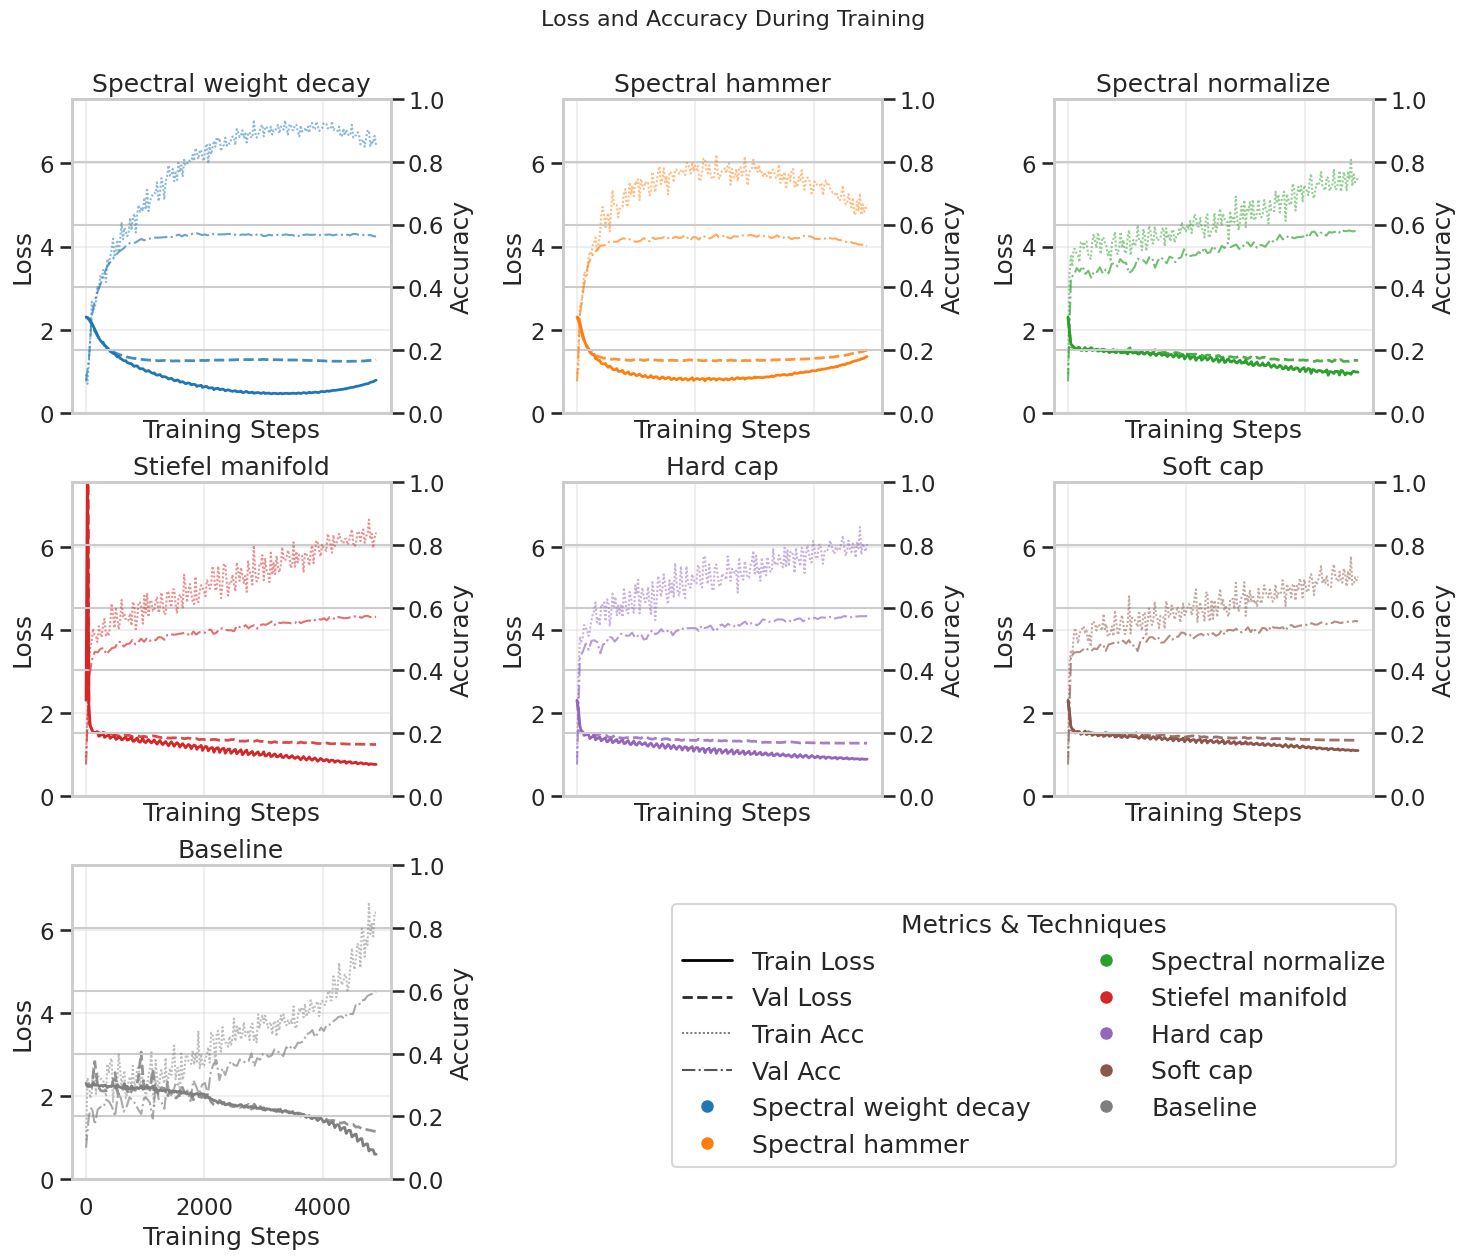

In [7]:
# Generate alpha values from 1.0 down to 0.5, these determine opacity
alphas = np.linspace(1.0, 0.5, 4)
line_styles = ['-', '--', '-.', (0, (1,1))] 

# Group the dataframe by technique only
grouped = results_df.groupby(['technique'])

# Get unique techniques
techniques = list(grouped.groups.keys())

# Determine the number of plots needed and create a grid
num_plots = len(techniques)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Ceiling division

# Create the figure with appropriate size and share both x and y axes
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharex=True)
axs = axs.flatten()

# Find global min and max values for losses
min_train_loss = min([min(subset['train_loss']) for _, subset in grouped])
max_train_loss = max([max(subset['train_loss'][:len(subset['val_loss'])]) for _, subset in grouped])
min_val_loss = min([min(subset['val_loss']) for _, subset in grouped])
max_val_loss = max([max(subset['val_loss']) for _, subset in grouped])

# Add some padding to the ranges
min_loss = min(min_train_loss, min_val_loss)
max_loss = max(max_train_loss, max_val_loss)
min_loss_value = min(min_loss)
max_loss_value = max(max_loss)
loss_range = max_loss_value - min_loss_value
loss_padding = loss_range * 0.1
# Set min to 0 and cap max at 5
loss_ylim = (0, 5 + loss_padding)

# Create lists to store legend handles and labels
all_handles = []
all_labels = []

# Loop through each technique
for i, technique in enumerate(tech_map.keys()):
    if i >= len(axs):  # Safety check
        break
        
    # Filter the dataframe for the technique
    subset_df = results_df[results_df['technique'] == technique]
    
    if len(subset_df) == 0:
        continue
        
    subset = subset_df.iloc[0]
    
    # Get training and validation loss values
    train_loss = subset['train_loss']
    val_loss = subset['val_loss']
    train_acc = subset['train_acc']
    val_acc = subset['val_acc']
    
    # Plot train loss and validation loss with different line styles using the defined x-axes
    color = tech_colors.get(tech_map.get(technique, "Unknown"))
    
    # Create a secondary y-axis for accuracy
    ax = axs[i]
    ax2 = ax.twinx()
    
    # Plot loss on primary axis
    train_line = ax.plot(train_x_axis, train_loss, 
           linestyle=line_styles[0], 
           label='Train Loss', 
           alpha=alphas[0], 
           color=color,
           linewidth=2)[0]
    
    val_line = ax.plot(val_x_axis, val_loss, 
           linestyle=line_styles[1], 
           label='Val Loss', 
           alpha=alphas[1],
           color=color,
           linewidth=2)[0]
    
    # Plot accuracy on secondary axis
    train_acc_line = ax2.plot(train_x_axis, train_acc, 
            linestyle=line_styles[3], 
            label='Train Acc', 
            alpha=alphas[3], 
            color=color,
            linewidth=1.5)[0]
    
    val_acc_line = ax2.plot(val_x_axis, val_acc, 
            linestyle=line_styles[2], 
            label='Val Acc', 
            alpha=alphas[2],
            color=color,
            linewidth=1.5)[0]
    
    # Set secondary axis limits to start from 0
    ax2.set_ylim(0, 1)
    ax2.set_ylabel('Accuracy')
    
    # Add title and labels
    ax.set_title(f'{tech_map.get(technique, technique)}')
    ax.set_xlabel('Training Steps')
    ax.set_ylabel('Loss')
    
    # Store handles and labels for the combined legend (only for the first technique)
    if i == 0:
        # Create black lines for the legend with different styles
        all_handles.extend([
            plt.Line2D([0], [0], color='black', linestyle=line_styles[0], linewidth=2, alpha=alphas[0]),
            plt.Line2D([0], [0], color='black', linestyle=line_styles[1], linewidth=2, alpha=alphas[1]),
            plt.Line2D([0], [0], color='black', linestyle=line_styles[3], linewidth=1.5, alpha=alphas[3]),
            plt.Line2D([0], [0], color='black', linestyle=line_styles[2], linewidth=1.5, alpha=alphas[2])
        ])
        all_labels.extend(['Train Loss', 'Val Loss', 'Train Acc', 'Val Acc'])

    ax.grid(True, alpha=0.3)

    # Set y limits to be the same for all plots, starting from 0
    ax.set_ylim(loss_ylim)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Add technique color legend entries
for tech, color_name in tech_colors.items():
    all_handles.append(plt.Line2D([0], [0], color=color_name, marker='o', linestyle='None', markersize=8))
    all_labels.append(tech)

# Create a single legend at the bottom right of the figure
fig.legend(all_handles, all_labels, loc='lower right', bbox_to_anchor=(0.95, 0.2), 
           ncol=2, frameon=True, fontsize='medium', title='Metrics & Techniques')

# Title for the entire figure
fig.suptitle('Loss and Accuracy During Training', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.2)  # Adjust bottom to make room for the legend
plt.show()


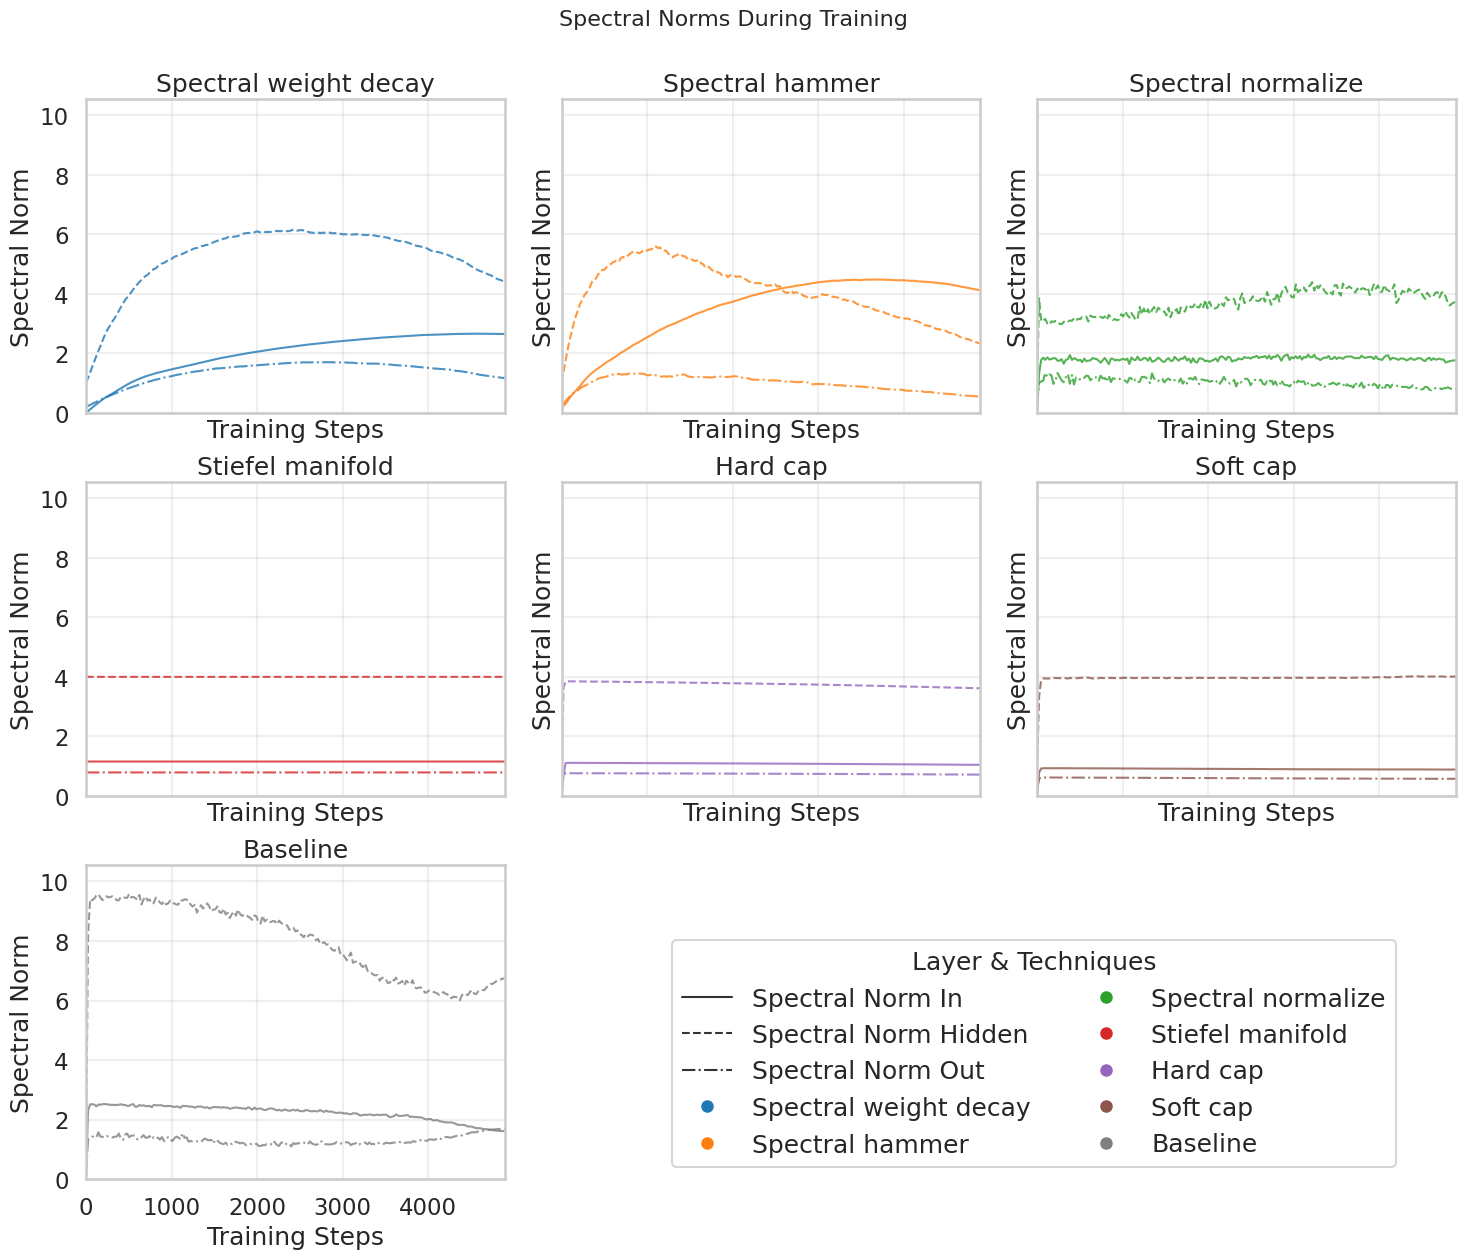

In [8]:
# Generate alpha values from 1.0 down to 0.5, these determine opacity
alphas = np.linspace(1.0, 0.5, 4)
line_styles = ['-', '--', '-.', (0, (1,1))] 

# Group the dataframe by technique only
grouped = results_df.groupby(['technique'])

# Get unique techniques
techniques = list(grouped.groups.keys())

# Determine the number of plots needed and create a grid
num_plots = len(techniques)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Ceiling division

# Create the figure with appropriate size
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharex=True, sharey=True)
axs = axs.flatten()

# Create lists to store legend handles and labels
all_handles = []
all_labels = []

# First pass: Find the maximum spectral norm across all techniques for consistent y-axis
max_spectral_norm_overall = 0
for technique in tech_map.keys():
    subset_df = results_df[results_df['technique'] == technique]
    
    if len(subset_df) == 0:
        continue
        
    subset = subset_df.iloc[0]
    
    # Get spectral norm values
    spectral_norms_in = subset['spectral_norms_in']
    spectral_norms_0 = subset['spectral_norms_0']
    spectral_norms_out = subset['spectral_norms_out']
    
    # Find the max spectral norm value across all techniques
    max_spectral_norm_overall = max(
        max_spectral_norm_overall,
        max(spectral_norms_in) if len(spectral_norms_in) > 0 else 0, 
        max(spectral_norms_0) if len(spectral_norms_0) > 0 else 0,
        max(spectral_norms_out) if len(spectral_norms_out) > 0 else 0
    )

# Loop through each technique
for i, technique in enumerate(tech_map.keys()):
    if i >= len(axs):  # Safety check
        break
        
    # Filter the dataframe for the technique
    subset_df = results_df[results_df['technique'] == technique]
    
    if len(subset_df) == 0:
        continue
        
    subset = subset_df.iloc[0]
    
    # Get spectral norm values
    spectral_norms_in = subset['spectral_norms_in']
    spectral_norms_0 = subset['spectral_norms_0']
    spectral_norms_out = subset['spectral_norms_out']
    
    # Get the color for this technique
    color = tech_colors.get(tech_map.get(technique, "Unknown"))
    
    ax = axs[i]
    
    # Plot spectral norms with consistent colors for the layers
    in_norm_line = ax.plot(train_x_axis[:len(spectral_norms_in)], spectral_norms_in, 
            linestyle=line_styles[0], 
            label='Spectral Norm In', 
            alpha=0.8, 
            color=color,
            linewidth=1.5)[0]
    
    hidden_norm_line = ax.plot(train_x_axis[:len(spectral_norms_0)], spectral_norms_0, 
            linestyle=line_styles[1], 
            label='Spectral Norm Hidden', 
            alpha=0.8,
            color=color,
            linewidth=1.5)[0]
    
    out_norm_line = ax.plot(train_x_axis[:len(spectral_norms_out)], spectral_norms_out, 
            linestyle=line_styles[2], 
            label='Spectral Norm Out', 
            alpha=0.8,
            color=color,
            linewidth=1.5)[0]
    
    # Use the same y limit for all plots based on the overall maximum
    ax.set_ylim(0, max_spectral_norm_overall * 1.1)
    
    # Make sure x-axis starts at 0
    ax.set_xlim(0, max(train_x_axis[:max(len(spectral_norms_in), len(spectral_norms_0), len(spectral_norms_out))]))
    ax.set_ylabel('Spectral Norm')
    
    # Add title and labels with technique color
    ax.set_title(f'{tech_map.get(technique, technique)}')
    ax.set_xlabel('Training Steps')
    
    # Store handles and labels for the combined legend (only for the first technique)
    if i == 0:
        # Create lines for the legend with different styles
        all_handles.extend([
            plt.Line2D([0], [0], color='black', linestyle=line_styles[0], linewidth=1.5, alpha=0.8),
            plt.Line2D([0], [0], color='black', linestyle=line_styles[1], linewidth=1.5, alpha=0.8),
            plt.Line2D([0], [0], color='black', linestyle=line_styles[2], linewidth=1.5, alpha=0.8),
        ])
        all_labels.extend(['Spectral Norm In', 'Spectral Norm Hidden', 'Spectral Norm Out'])

    ax.grid(True, alpha=0.3)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Add technique color legend entries
for tech, color_name in tech_colors.items():
    all_handles.append(plt.Line2D([0], [0], color=color_name, marker='o', linestyle='None', markersize=8))
    all_labels.append(tech)

# Create a single legend at the bottom right of the figure
fig.legend(all_handles, all_labels, loc='lower right', bbox_to_anchor=(0.95, 0.2), 
           ncol=2, frameon=True, fontsize='medium', title='Layer & Techniques')

# Title for the entire figure
fig.suptitle('Spectral Norms During Training', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.2)  # Adjust bottom to make room for the legend
plt.show()


## Loading in the weights and plotting full spectra
____

In [9]:
weight_paths = {
    "spec_wd":       "results/spec_wd_cifar_muon_val_loss_1.279_acc_0.562_lipschitz_234.594.npz",
    "spec_hammer":    "results/spec_hammer_cifar_muon_val_loss_1.508_acc_0.532_lipschitz_89.984.npz",
    "spec_normalize":       "results/spec_normalize_cifar_muon_val_loss_1.256_acc_0.578_lipschitz_90.805.npz",
    "orthogonal":   "results/orthogonal_cifar_muon_val_loss_1.237_acc_0.571_lipschitz_63.718.npz",
    "hard_cap":           "results/hard_cap_cifar_muon_val_loss_1.269_acc_0.574_lipschitz_47.197.npz",
    "soft_cap":           "results/soft_cap_cifar_muon_val_loss_1.338_acc_0.557_lipschitz_35.644.npz",
    "none":           "results/none_cifar_muon_val_loss_1.152_acc_0.596_lipschitz_322.002.npz",
}

In [10]:
# load in the weights for spec_wd to see what they look like
data = np.load(weight_paths['spec_wd'], allow_pickle=True)



In [11]:
array_names = data.files

In [12]:
array_names

['args', 'results', 'weights_checkpoint_0', 'weights_checkpoint_1']

In [13]:
weights = data['weights_checkpoint_1'].item()

In [14]:
weights.keys()

dict_keys([0, 1, 2])

In [15]:
layer_0_weights = np.array(weights[0])
layer_1_weights = np.array(weights[1])
layer_2_weights = np.array(weights[2])

In [16]:
layer_0_decomp = np.linalg.svd(layer_0_weights, full_matrices=True)
layer_1_decomp = np.linalg.svd(layer_1_weights, full_matrices=True)
layer_2_decomp = np.linalg.svd(layer_2_weights, full_matrices=True)
layer_0_singular_values = layer_0_decomp[1]
layer_1_singular_values = layer_1_decomp[1]
layer_2_singular_values = layer_2_decomp[1]

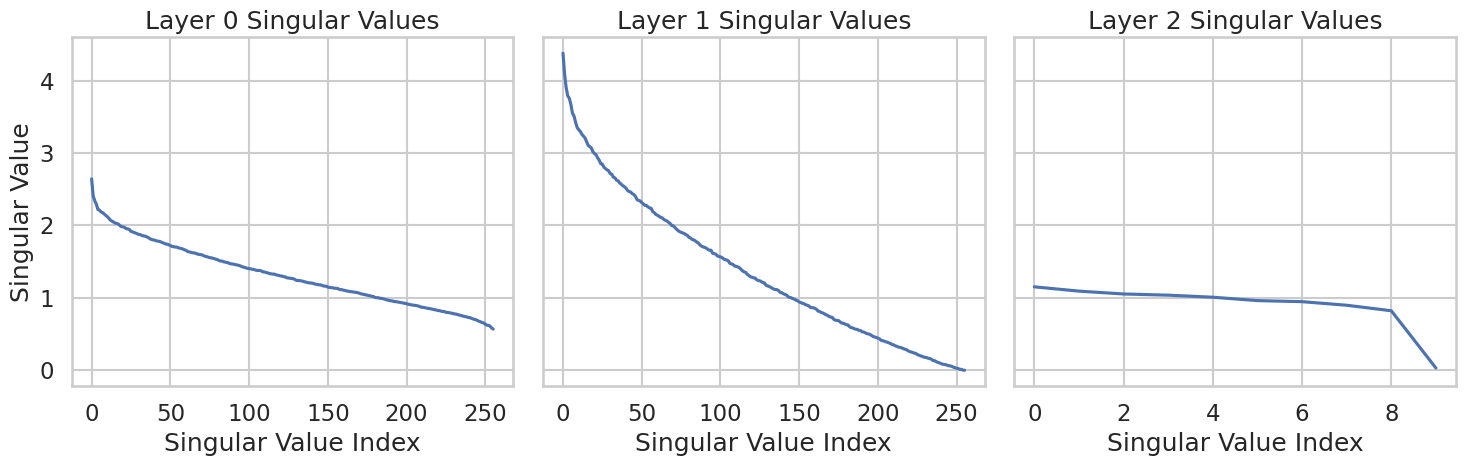

In [17]:
# plot the spectral decomposition of the weights
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].plot(layer_0_singular_values, '-')
axs[0].set_title('Layer 0 Singular Values')
axs[0].set_xlabel('Singular Value Index')
axs[0].set_ylabel('Singular Value')
axs[1].plot(layer_1_singular_values, '-')
axs[1].set_title('Layer 1 Singular Values')
axs[1].set_xlabel('Singular Value Index')
axs[2].plot(layer_2_singular_values, '-')
axs[2].set_title('Layer 2 Singular Values')
axs[2].set_xlabel('Singular Value Index')
plt.tight_layout()
plt.show()

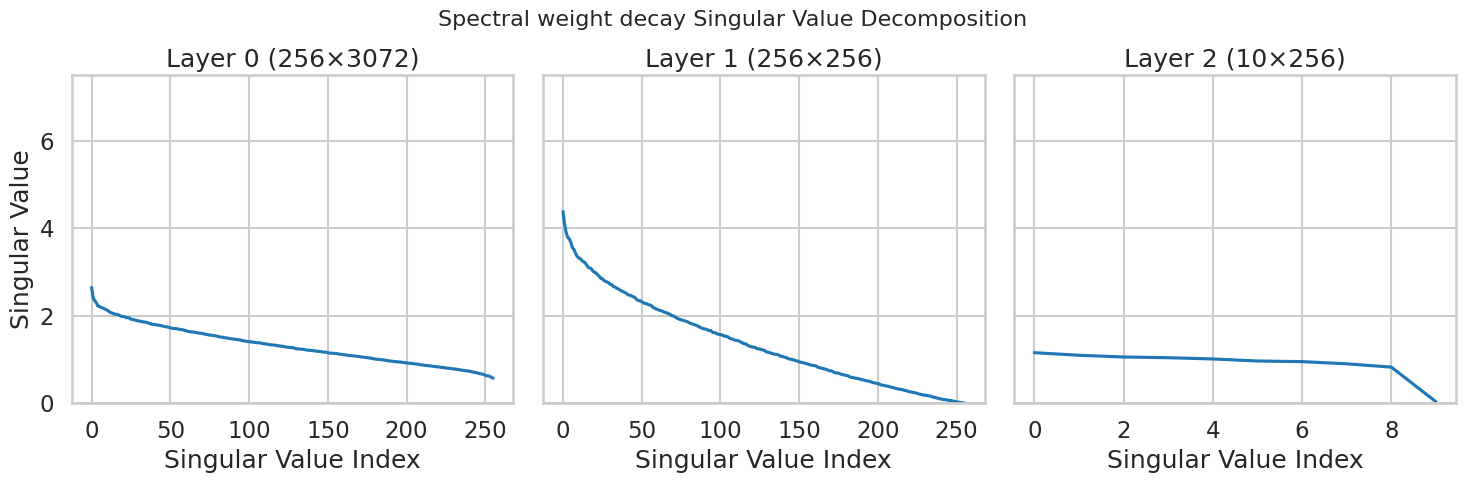

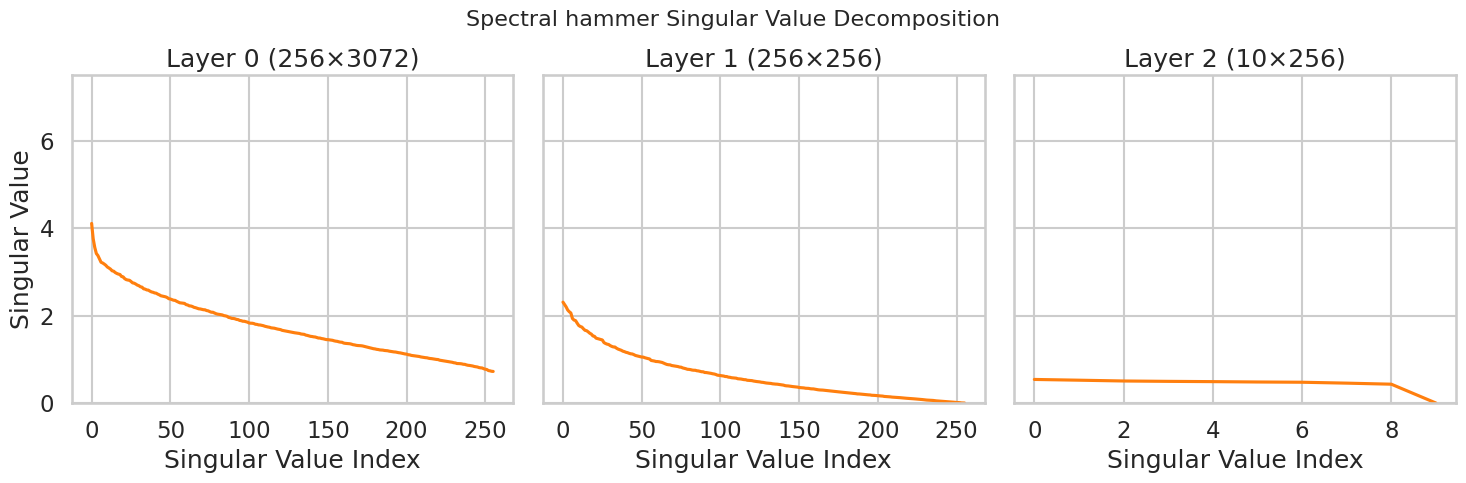

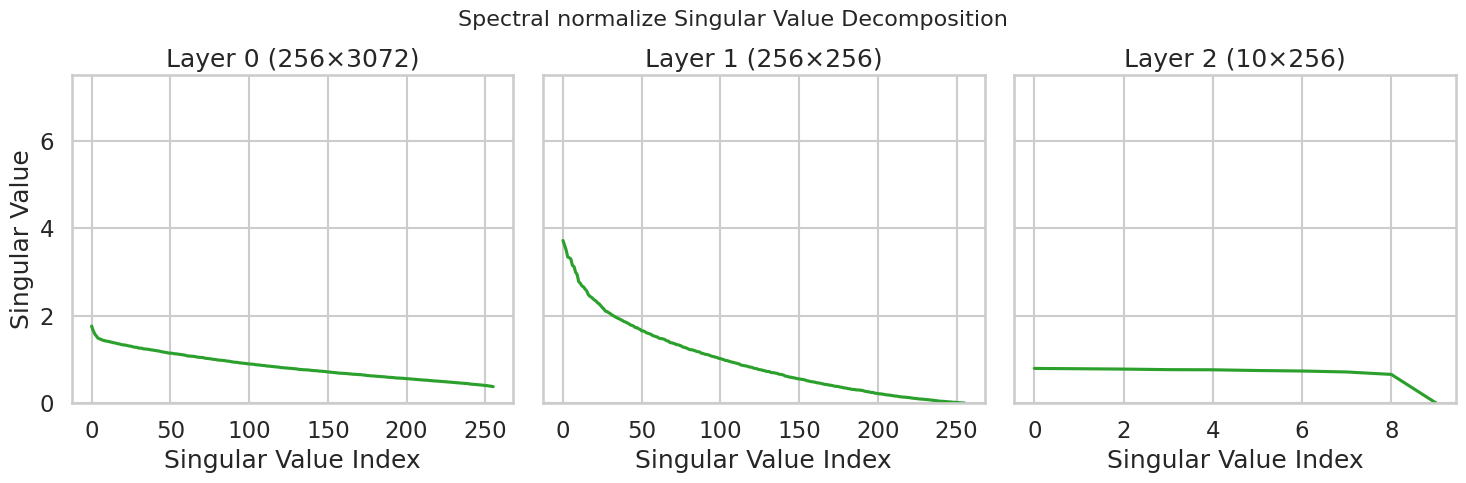

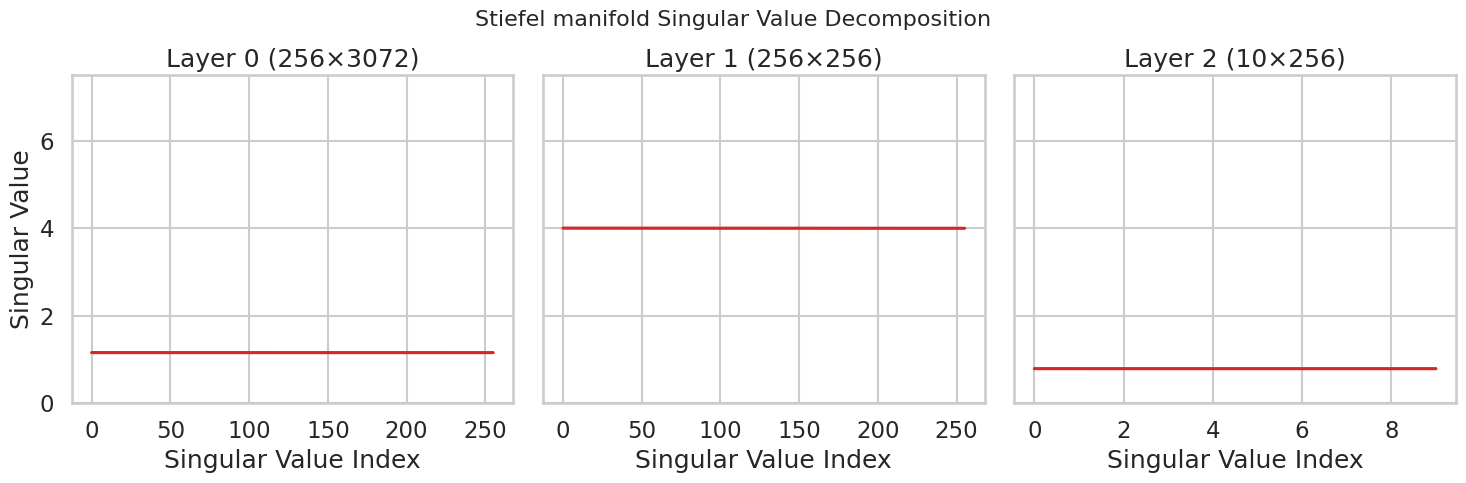

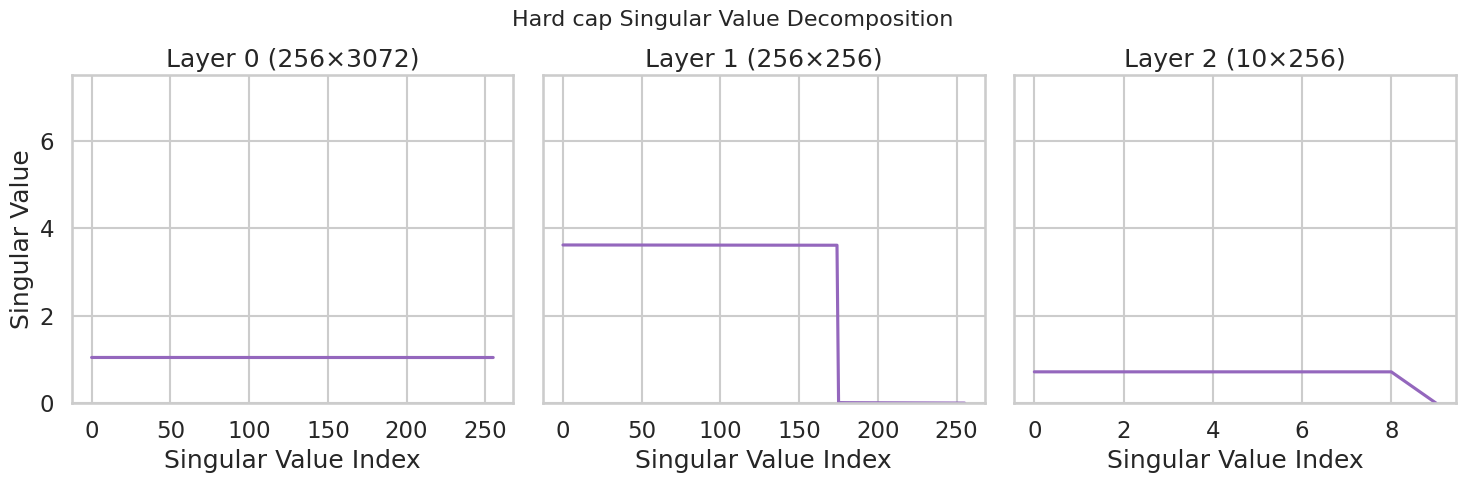

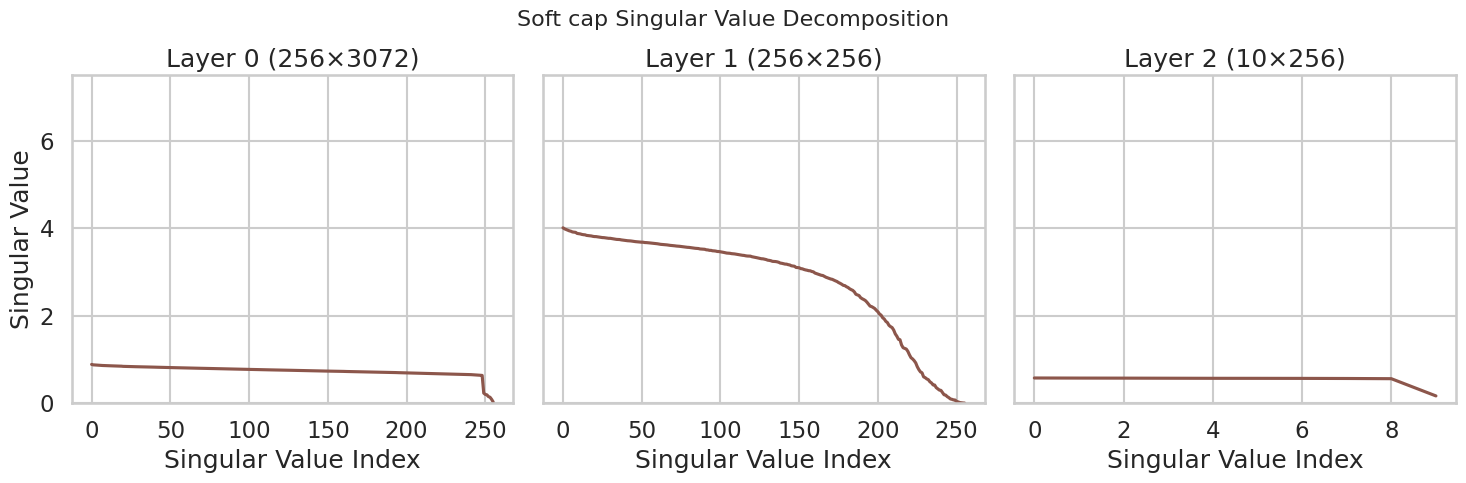

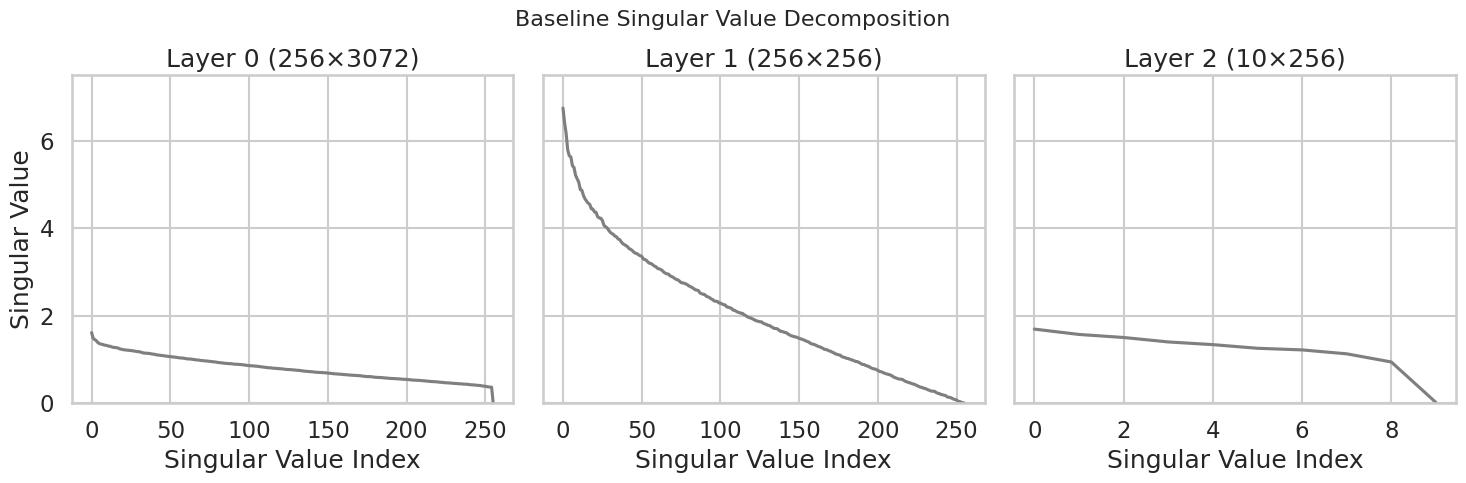

In [22]:
# create a function to plot the spectral decomposition of the weights for each technique, using that techiniques specified colors.
# Each technique can have it's own separate plot.

def plot_spectral_decomposition(technique, weights_path):
    """
    Plot the spectral decomposition of the weights for a given technique.
    
    Parameters:
    - technique: The name of the technique (e.g., "spec_wd", "spec_hammer").
    - weights_path: The path to the weights file.
    """
    # Load the weights
    data = np.load(weights_path, allow_pickle=True)
    
    # Extract the weights
    weights = data['weights_checkpoint_1'].item()
    
    # Get the layer weights
    layer_0_weights = np.array(weights[0])
    layer_1_weights = np.array(weights[1])
    layer_2_weights = np.array(weights[2])
    
    # Get layer shapes for labels
    layer_0_shape = layer_0_weights.shape
    layer_1_shape = layer_1_weights.shape
    layer_2_shape = layer_2_weights.shape
    
    # Perform SVD
    layer_0_decomp = np.linalg.svd(layer_0_weights, full_matrices=True)
    layer_1_decomp = np.linalg.svd(layer_1_weights, full_matrices=True)
    layer_2_decomp = np.linalg.svd(layer_2_weights, full_matrices=True)
    
    # Get singular values
    layer_0_singular_values = layer_0_decomp[1]
    layer_1_singular_values = layer_1_decomp[1]
    layer_2_singular_values = layer_2_decomp[1]
    
    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    
    color = tech_colors.get(tech_map.get(technique, "Unknown"))
    
    # Plot singular values for each layer
    axs[0].plot(layer_0_singular_values, '-', color=color)
    axs[0].set_title(f'Layer 0 ({layer_0_shape[0]}×{layer_0_shape[1]})')
    axs[0].set_xlabel('Singular Value Index')
    axs[0].set_ylabel('Singular Value')
    
    axs[1].plot(layer_1_singular_values, '-', color=color)
    axs[1].set_title(f'Layer 1 ({layer_1_shape[0]}×{layer_1_shape[1]})')
    axs[1].set_xlabel('Singular Value Index')
    
    axs[2].plot(layer_2_singular_values, '-', color=color)
    axs[2].set_title(f'Layer 2 ({layer_2_shape[0]}×{layer_2_shape[1]})')
    axs[2].set_xlabel('Singular Value Index')
    
    # Set y limits to be the same for all plots
    plt.ylim(0, 7.5)
    
    # Add a super title for the technique
    fig.suptitle(f'{tech_map.get(technique, technique)} Singular Value Decomposition', 
                fontsize=16, y=0.98)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Make room for the super title
    plt.show()

# Plot for each technique
for technique, path in weight_paths.items():
    plot_spectral_decomposition(technique, path)


## Test our power iteration

In [24]:
import jax
import jax.numpy as jnp

In [74]:
def _power_iterate(M, key, steps=1000, eps=0):
    """Power iterate to find the principal singular value and vectors of M."""
    transpose = M.shape[0] > M.shape[1]
    if transpose:
        M = M.T
    A = M.T @ M

    # we use fold_in get different random numbers for different matrices
    # while avoiding the hassle of returning the subkey from splitting
    subkey = jax.random.fold_in(key, jnp.sum(M))
    v0 = jax.random.normal(subkey, shape=(M.shape[1],))
    v0 /= jnp.linalg.norm(v0)

    def cond_fun(state):
        v, old_v, i = state
        delta = jnp.max(jnp.abs(v - old_v))
        return jnp.logical_and(delta > eps, i < steps)

    def body_fun(state):
        v, _, i = state
        v_new = jnp.dot(A, v)
        v_new_norm = jnp.linalg.norm(v_new)
        v_new /= v_new_norm
        return (v_new, v, i + 1)

    v, _, _ = jax.lax.while_loop(cond_fun, body_fun, (v0, v0, 0))
    v_new = A @ v
    sigma_max = jnp.linalg.norm(v_new)
    if transpose:
        v = v.T
    u = M @ v / sigma_max
    return u, sigma_max, v

In [99]:

def power_iteration(A, key, num_iters = 16):
    """
    Compute the top singular value and corresponding singular vectors of A via power iteration.

    Args:
        A: A 2D array of shape (m, n).
        key: A JAX PRNG key for initializing the random vector (to ensure different draws each call).
        num_iters: Number of power iterations to run.

    Returns:
        v: The top right singular vector (shape (n,)).
        sigma: The largest singular value.
        u: The top left singular vector (shape (m,)).
    """
    m, n = A.shape
    # Fold in dimensions to diversify the key per matrix shape
    init_key = jax.random.fold_in(key, m)
    init_key = jax.random.fold_in(init_key, n)

    if m < n:
        # iterate on AA^T to find u (shape m)
        u = jax.random.normal(init_key, (m,))
        u = u / jnp.linalg.norm(u)

        def body_u(u, _):
            w = A @ (A.T @ u)
            return w / jnp.linalg.norm(w), None

        u, _ = jax.lax.scan(body_u, u, None, length=num_iters)
        # compute sigma and v
        ATu = A.T @ u
        sigma = jnp.linalg.norm(ATu)
        v = ATu / sigma
    else:
        # iterate on A^T A to find v (shape n)
        v = jax.random.normal(init_key, (n,))
        v = v / jnp.linalg.norm(v)

        def body_v(v, _):
            w = A.T @ (A @ v)
            return w / jnp.linalg.norm(w), None

        v, _ = jax.lax.scan(body_v, v, None, length=num_iters)
        # compute sigma and u
        Av = A @ v
        sigma = jnp.linalg.norm(Av)
        u = Av / sigma

    return u, sigma, v

In [75]:
# test the power iteration function on a matrix made by an outer product
key_1 = jax.random.PRNGKey(1)
key_2 = jax.random.PRNGKey(2)
key_3 = jax.random.PRNGKey(3)
key_4 = jax.random.PRNGKey(5)
u_1 = jax.random.normal(key_1, shape=(2,))
v_1 = jax.random.normal(key_2, shape=(2,))
u_2 = jax.random.normal(key_3, shape=(2,))
v_2 = jax.random.normal(key_4, shape=(2,))
u_1 /= jnp.linalg.norm(u_1)
v_1 /= jnp.linalg.norm(v_1)
u_2 /= jnp.linalg.norm(u_2)
v_2 /= jnp.linalg.norm(v_2)
print(f"u_1: {u_1}")
print(f"v_1: {v_1}")
print(f"u_2: {u_2}")
print(f"v_2: {v_2}")
M = jnp.outer(u_1, v_1) + jnp.outer(u_2, v_2)
M_0 = M.copy()
u, sigma, v = _power_iterate(M, key)
# v, sigma, u = power_iteration(M, key_1)
print(f"max singular value: {sigma}")

# get the true singular values
u, s, v = jnp.linalg.svd(M_0, full_matrices = True)
print(f"true spectral norm values: {s[0]}")


u_1: [-0.8767744  0.4809021]
v_1: [0.27016982 0.9628127 ]
u_2: [-0.6847186   0.72880745]
v_2: [-0.05968906  0.99821705]
max singular value: 2.798848867416382
true spectral norm values: 1.9478973150253296


In [104]:
# make a random rectangular matrix
key = jax.random.PRNGKey(0)
M = jax.random.normal(key, shape=(3, 4))
M_0 = M.copy()
# u, sigma, v = _power_iterate(M, key)
u, sigma, v = power_iteration(M, key_1)
print(f"max singular value: {sigma}")

u, s, v = jnp.linalg.svd(M_0, full_matrices = True)
print(f"true spectral norm values: {s[0]}")


max singular value: 3.2636301517486572
true spectral norm values: 3.2636301517486572


In [103]:
# compose the first rank approximation using u and v
M_approx = jnp.outer(u, v)

mean error: 6.592485442524776e-05


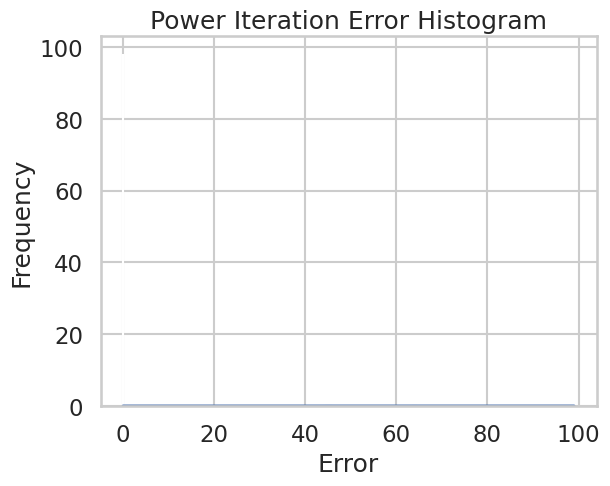

In [73]:
errors = []
for i in range(100):
    # test the power iteration function on a matrix made by an outer product
    key_1 = jax.random.PRNGKey(i)
    key_2 = jax.random.PRNGKey(i + 1)
    key_3 = jax.random.PRNGKey(i + 2)
    key_4 = jax.random.PRNGKey(i + 3)
    u_1 = jax.random.normal(key_1, shape=(2,))
    v_1 = jax.random.normal(key_2, shape=(2,))
    u_2 = jax.random.normal(key_3, shape=(2,))
    v_2 = jax.random.normal(key_4, shape=(2,))
    u_1 /= jnp.linalg.norm(u_1)
    v_1 /= jnp.linalg.norm(v_1)
    u_2 /= jnp.linalg.norm(u_2)
    v_2 /= jnp.linalg.norm(v_2)
    M = jnp.outer(u_1, v_1) + jnp.outer(u_2, v_2)
    M_0 = M.copy()
    u, sigma, v = power_iteration(M, key_1)

    # get the true singular values
    u, s, v = jnp.linalg.svd(M_0, full_matrices = True)
    error = jnp.abs(sigma - s[0])
    error /= s[0]
    jnp.abs(error)
    errors.append(error)

print(f"mean error: {np.mean(errors)}")
# plot the errors
plt.plot(errors, '-')
plt.title('Power Iteration Error')
# plot a histogram of the errors
plt.hist(errors, bins=20)
plt.title('Power Iteration Error Histogram')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()